In [24]:
#Jupyter Notebook, Python 3, Statistics, Python Packages – Numpy, Pandas, Matplotlib, Scipy
#•	Stocks – P&G, FORD and MICROSOFT
#•	Calculated ROR – Simple Returns (along with their individual graphs) and Annual Returns of the Stocks
#•	SD, Variance, Covariance and Correlation
#•	Calculated Portfolio Returns with respect to their individual weights
#•	Variance and Volatility of the Portfolio
#•	Diversifiable and Undiversifiable Risk
#•	Calculation of Value at Risk (VaR) considering the initial investment of $1Mn

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
tickers = ['PG', 'F','MSFT']
data = pd.DataFrame()
for t in tickers:
    data[t] = wb.DataReader(t, data_source = 'yahoo', start = '2000-1-1')['Adj Close']

In [60]:
data.head()

,PG,F,MSFT
Date,,,
1999-12-31,29.213932,15.327993,37.453701
2000-01-03,28.580656,15.058455,37.393559
2000-01-04,28.030716,14.555305,36.130390
2000-01-05,27.497435,14.609213,36.511333
2000-01-06,28.763981,14.627183,35.288280


<p><b> Graphical Representation of Daily Stock Prices :</b></p>

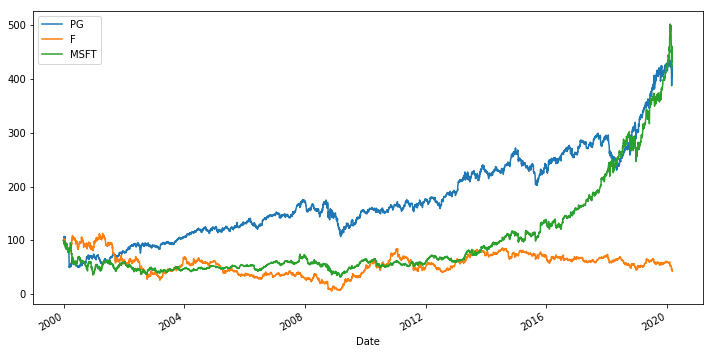

In [46]:
(data/data.iloc[0] * 100).plot(figsize = (12,6))

<p><b> Individual Security Returns & Risk : </b></p>

In [61]:
simple_returns = (data/data.shift(1)) - 1
simple_returns

,PG,F,MSFT
Date,,,
1999-12-31,NaN,NaN,NaN
2000-01-03,-0.021677,-0.017585,-0.001606
2000-01-04,-0.019242,-0.033413,-0.033780
2000-01-05,-0.019025,0.003704,0.010544
2000-01-06,0.046061,0.001230,-0.033498
2000-01-07,0.079953,0.073710,0.013068
2000-01-10,-0.004828,-0.018307,0.007291
2000-01-11,0.015633,-0.026806,-0.025613
2000-01-12,-0.006369,0.028742,-0.032571


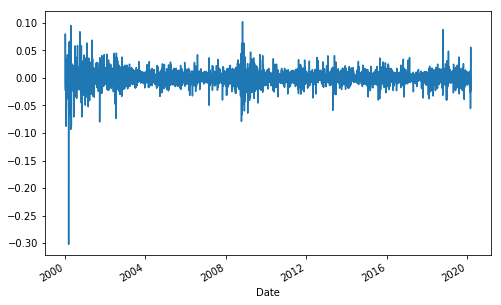

In [55]:
simple_returns['PG'].plot(figsize = (8,5))

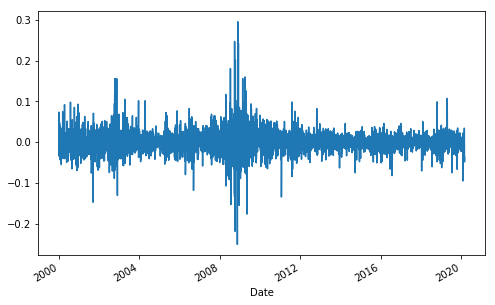

In [62]:
simple_returns['F'].plot(figsize = (8,5))

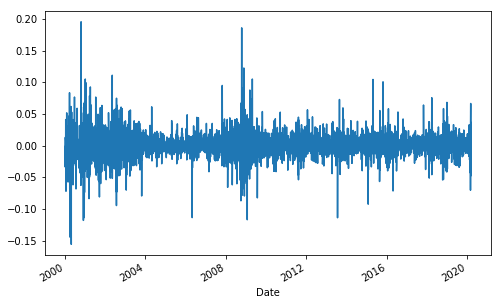

In [63]:
simple_returns['MSFT'].plot(figsize = (8,5))

In [43]:
annual_returns = simple_returns.mean() * 250
annual_returns

PG      0.092472
F       0.041995
MSFT    0.117255
dtype: float64

In [53]:
std_dev = simple_returns.std() * 250 ** 0.5
std_dev

PG      0.207878
F       0.411814
MSFT    0.300970
dtype: float64

In [54]:
var = simple_returns.var() * 250
var

PG      0.043213
F       0.169591
MSFT    0.090583
dtype: float64

In [9]:
covar = simple_returns.cov() * 250
covar

,PG,F,MSFT
PG,0.043213,0.019761,0.015437
F,0.019761,0.169591,0.041744
MSFT,0.015437,0.041744,0.090583


In [10]:
corr = simple_returns.corr()
corr

,PG,F,MSFT
PG,1.000000,0.230839,0.246733
F,0.230839,1.000000,0.336802
MSFT,0.246733,0.336802,1.000000


<p><b>Portfolio Analysis :</b></p>

In [11]:
weights = np.array([1/3 ,1/3 , 1/3])

In [12]:
preturns = np.dot(annual_returns, weights) #portfolioannualreturns
preturns

0.08390739102062716

In [13]:
pvar = np.dot(weights.T, np.dot(simple_returns.cov() * 250, weights)) #portfoliovariance
pvar

0.050807973365847685

In [14]:
pvol = pvar ** 0.5
pvol

0.2254062407429033

<p><b>Value at Risk (VaR) Calculation :</b></p>

In [15]:
initial_investment = 1000000

In [16]:
conf_level = 0.05

In [17]:
mean_investment = initial_investment * (1+preturns)
mean_investment

1083907.3910206272

In [18]:
std_investment = initial_investment * pvol
std_investment

225406.2407429033

In [19]:
cut_off = norm.ppf(conf_level, mean_investment, std_investment)
cut_off

713147.1183971659

In [20]:
valueatrisk = initial_investment - cut_off
valueatrisk

286852.8816028341

<p><b>Diversifiable & Undiversifiable Risk :</b></p>

In [22]:
drisk = pvar - (weights[0] ** 2 * var['PG']) - (weights[1] ** 2 * var['F']) - (weights[2] ** 2 * var['MSFT'])
str(round(drisk , 5) * 100) + '%'

'1.71%'

In [56]:
udrisk = pvar - drisk
str(round(udrisk , 5) * 100) + '%'

'3.3709999999999996%'